In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from yahoo_fin.stock_info import *
from sklearn.svm import SVR

# Read data and create dataframe

In [16]:
#get the stock code
df = get_data('AAPL', start_date='2022-1-1', end_date='2022-10-1')
future_days =5

#create a new column
df[str(future_days) + 'Day_Price_Forecast'] = df[['close']].shift(-future_days)
df

,open,high,low,close,adjclose,volume,ticker,5Day_Price_Forecast
2022-01-03,177.830002,182.880005,177.710007,182.009995,181.259933,104487900,AAPL,172.190002
2022-01-04,182.630005,182.940002,179.119995,179.699997,178.959442,99310400,AAPL,175.080002
2022-01-05,179.610001,180.169998,174.639999,174.919998,174.199158,94537600,AAPL,175.529999
2022-01-06,172.699997,175.300003,171.639999,172.000000,171.291183,96904000,AAPL,172.190002
2022-01-07,172.889999,174.139999,171.029999,172.169998,171.460495,86709100,AAPL,173.070007
...,...,...,...,...,...,...,...,...
2022-09-26,149.660004,153.770004,149.639999,150.770004,150.770004,93339400,AAPL,NaN
2022-09-27,152.740005,154.720001,149.949997,151.759995,151.759995,84442700,AAPL,NaN
2022-09-28,147.639999,150.639999,144.839996,149.839996,149.839996,146691400,AAPL,NaN
2022-09-29,146.100006,146.720001,140.679993,142.479996,142.479996,128138200,AAPL,NaN


# Fit Model

In [17]:
X = np.array(df[['close']])
X = X[:df.shape[0] - future_days]

Y = np.array(df[str(future_days) + 'Day_Price_Forecast'])
Y = Y[:- future_days]

# split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size =0.2)

from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(x_train,y_train)

SVR(C=1000.0, gamma=1e-05)

# Score the model

In [18]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf accuracy:', svr_rbf_confidence)

svr_rbf accuracy: 0.6465634809219967


# Prediction & Visualization

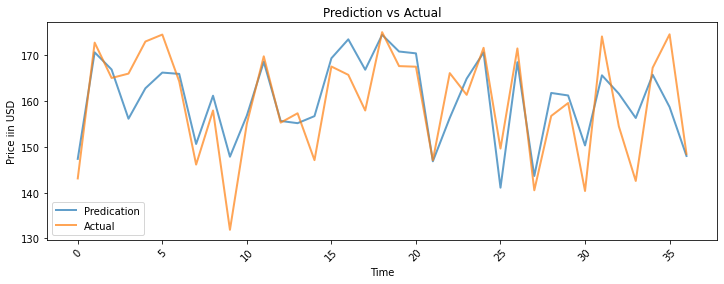

In [19]:
#predicted value
svm_prediction = svr_rbf.predict(x_test)

plt.figure(figsize=(12,4))
plt.plot(svm_prediction, label='Predication', lw=2, alpha=.7)
plt.plot(y_test, label ='Actual', lw=2, alpha= .7)
plt.title('Prediction vs Actual')
plt.ylabel('Price iin USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()
